# Regridding ERA5 Data

<div style="border: 2px solid #006d77; background-color: #83c5be; padding: 10px; margin-bottom: 10px; width: 40%;">
  <h3>Notebook Deliverables:</h3>
  <ul>
    <li>Extract ERA5 data on Google Cloud</li>
    <li>Construct an objective interpolating grid</li>
    <li>Interpolate ERA5 data onto the objective grid</li>
  </ul>
</div>

In [44]:
import xesmf
import xarray as xr
import cartopy.crs as ccrs
import numpy as np
import matplotlib.pyplot as plt
import cmocean.cm as cm

In [45]:
gridded_era5 = xr.open_zarr(
    "gs://gcp-public-data-arco-era5/ar/1959-2022-full_37-1h-0p25deg-chunk-1.zarr-v2",
    chunks={'time': 48},
    consolidated=True,
)
gridded_era5 = gridded_era5.isel(time = 0)["sea_surface_temperature"].compute()
gridded_era5 = gridded_era5.rename({"longitude":"lon", "latitude":'lat'})

In [51]:
# define 2.5x2.5 grid
dx = 2.5
lon = np.arange(dx, 360 + dx, dx)
lat = np.arange(90 - dx, -90 - dx, -dx)
grid = xr.Dataset()
grid["lon"] = xr.DataArray(lon, dims=("lon"))
grid["lat"] = xr.DataArray(lat, dims=("lat"))

#regrid to coarse 
regridder_c = xesmf.Regridder(gridded_era5, grid, 'bilinear', periodic = True)
regridded_era5 = regridder_c(gridded_era5)

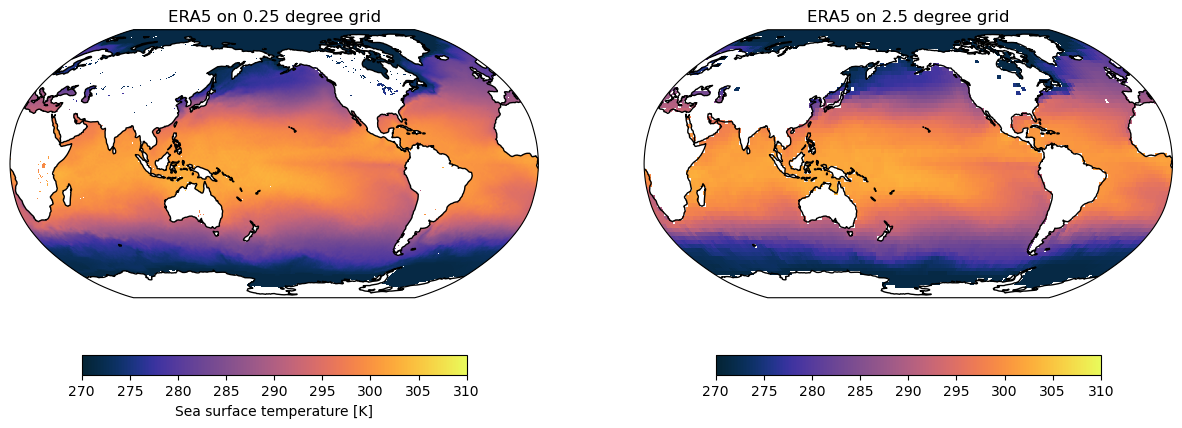

In [54]:
cbar_kwargs = dict(orientation = "horizontal", fraction = 0.05)
kwargs = dict(x='lon', y='lat',transform = ccrs.PlateCarree(), cbar_kwargs = cbar_kwargs, vmin = 270, vmax = 310, cmap = cm.thermal)

fig, ax = plt.subplots(1,2, figsize = (15, 5), subplot_kw={'projection':ccrs.Robinson(190)})
gridded_era5.plot(ax = ax[0], **kwargs); ax[0].set_title("ERA5 on 0.25 degree grid")
regridded_era5.plot(ax = ax[1], **kwargs); ax[1].set_title("ERA5 on 2.5 degree grid")
[a.coastlines() for a in ax.flatten()];

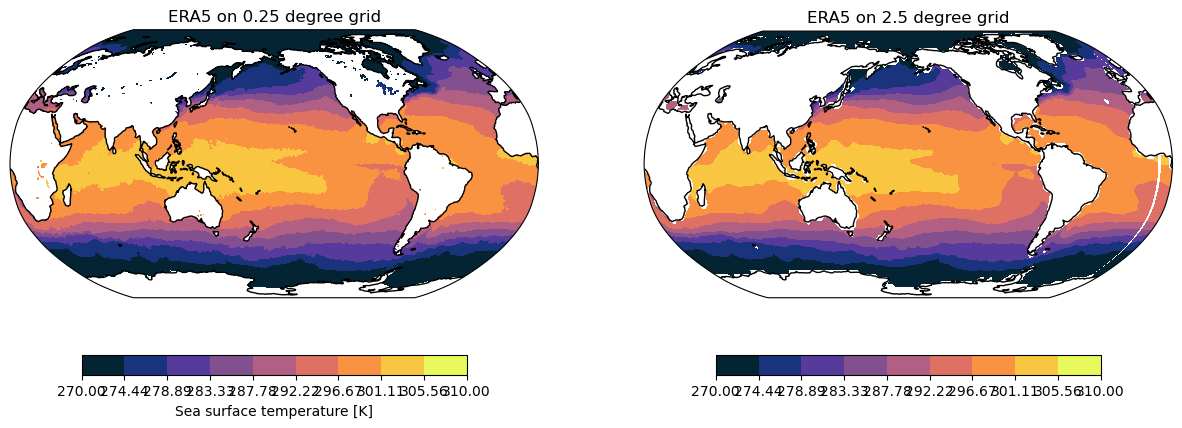

In [55]:
cbar_kwargs = dict(orientation = "horizontal", fraction = 0.05)
kwargs = dict(x='lon', y='lat',transform = ccrs.PlateCarree(), cbar_kwargs = cbar_kwargs, vmin = 270, vmax = 310, levels = 10, cmap = cm.thermal)

fig, ax = plt.subplots(1,2, figsize = (15, 5), subplot_kw={'projection':ccrs.Robinson(190)})
gridded_era5.plot.contourf(ax = ax[0], **kwargs); ax[0].set_title("ERA5 on 0.25 degree grid")
regridded_era5.plot.contourf(ax = ax[1], **kwargs); ax[1].set_title("ERA5 on 2.5 degree grid")

[a.coastlines() for a in ax.flatten()];

## Section 1 <a id="section-1"></a>
